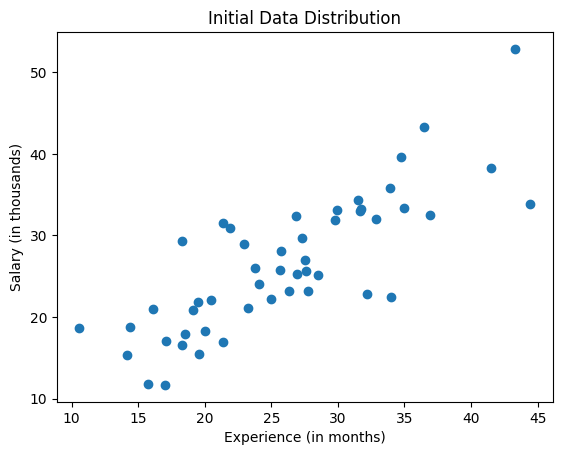

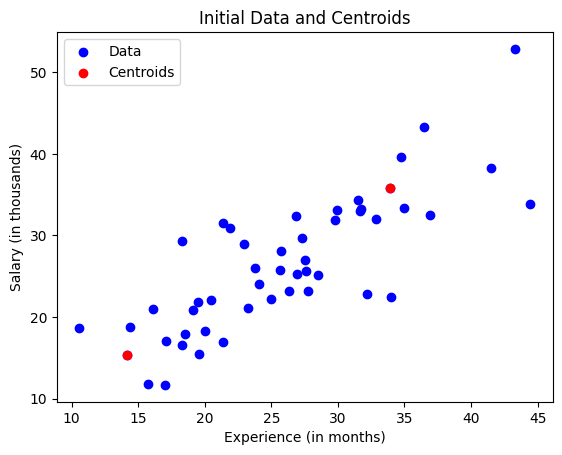

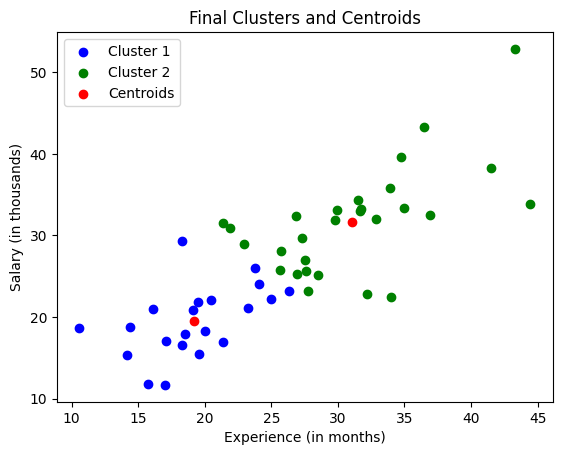

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt

# Read the data
data = pd.read_csv('/content/Experience-Salary.csv')

# Extract the features
x = data['exp(in months)'].values
y = data['salary(in thousands)'].values

# Initial scatter plot of the data
plt.scatter(x, y)
plt.xlabel('Experience (in months)')
plt.ylabel('Salary (in thousands)')
plt.title('Initial Data Distribution')
plt.show()

# Number of clusters (k)
k = 2

# Initialize centroids by randomly selecting data points
Centroids = data.sample(n=k)

# Plot the initial data and centroids
plt.scatter(x, y, c='b', label='Data')
plt.scatter(Centroids['exp(in months)'], Centroids['salary(in thousands)'], c='r', label='Centroids')
plt.xlabel('Experience (in months)')
plt.ylabel('Salary (in thousands)')
plt.legend()
plt.title('Initial Data and Centroids')
plt.show()

# Convergence criteria
diff = 1
j = 0

# Start the k-means clustering algorithm
while diff != 0:
    XD = data.copy()  # Create a copy of the data
    i = 1
    for index1, row_c in Centroids.iterrows():
        ED = []
        for index2, row_d in XD.iterrows():
            d1 = (row_c["exp(in months)"] - row_d["exp(in months)"]) ** 2
            d2 = (row_c["salary(in thousands)"] - row_d["salary(in thousands)"]) ** 2
            d = sqrt(d1 + d2)
            ED.append(d)
        data[i] = ED
        i = i + 1

    C = []
    for index, row in data.iterrows():
        min_dist = row[1]
        pos = 1
        for i in range(k):
            if row[i + 1] < min_dist:
                min_dist = row[i + 1]
                pos = i + 1
        C.append(pos)
    data["Cluster"] = C

    Centroids_new = data.groupby(["Cluster"]).mean()[["exp(in months)", "salary(in thousands)"]]

    if j == 0:
        diff = 1
        j = j + 1
    else:
        diff = (
            (Centroids_new['exp(in months)'] - Centroids['exp(in months)']).sum() +
            (Centroids_new['salary(in thousands)'] - Centroids['salary(in thousands)']).sum()
        )

    Centroids = data.groupby(["Cluster"]).mean()[["exp(in months)", "salary(in thousands)"]]

# Plot the final clusters
colors = ['b', 'g', 'k']
for k in range(k):
    data_cluster = data[data["Cluster"] == k + 1]
    plt.scatter(data_cluster["exp(in months)"], data_cluster["salary(in thousands)"], c=colors[k], label=f'Cluster {k+1}')

plt.scatter(Centroids['exp(in months)'], Centroids['salary(in thousands)'], c='r', label='Centroids')
plt.xlabel('Experience (in months)')
plt.ylabel('Salary (in thousands)')
plt.legend()
plt.title('Final Clusters and Centroids')
plt.show()
